<a href="https://colab.research.google.com/github/miltiadiss/Data-Mining/blob/main/question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ερώτημα 3**

**Αλγόριθμος KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

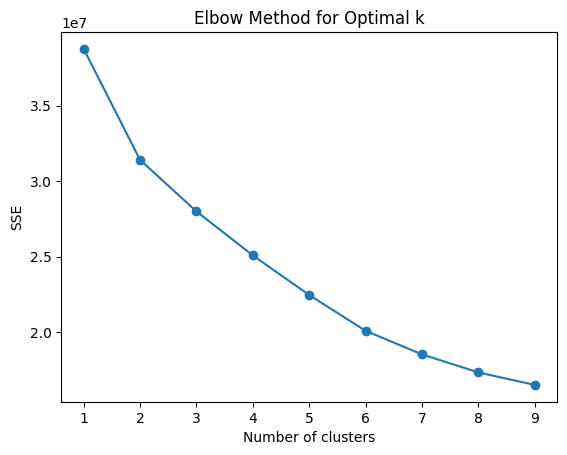

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ορισμός του φακέλου που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'

# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
all_data = []
# Λίστα για τα ονόματα των αρχείων
file_names = []
# Λίστες για τις μέσες τιμές από κάθε αρχείο
mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))
        file_names.append(filename)  # Κρατάμε το όνομα του αρχείου για κάθε δείγμα

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
        X = df[columns]

        # Αποθήκευση των δεδομένων στη λίστα
        all_data.append(X)

        # Υπολογισμός μέσης τιμής κάθε στήλης
        mean_values = X.mean().values

        # Προσθήκη των μέσων τιμών στη λίστα
        mean_values_list.append(mean_values)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
all_data_combined = np.concatenate(all_data, axis=0)

# Κανονικοποίηση των πλήρων δεδομένων
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_combined)

# Υπολογισμός του SSE για διαφορετικούς αριθμούς συστάδων
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_data_scaled)
    sse.append(kmeans.inertia_)

# Σχεδίαση της καμπύλης SSE
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ορισμός του φακέλου που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'

# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
all_data = []
# Λίστα για τα ονόματα των αρχείων
file_names = []
# Λίστες για τις μέσες τιμές από κάθε αρχείο
mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))
        file_names.append(filename)  # Κρατάμε το όνομα του αρχείου για κάθε δείγμα

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
        X = df[columns]

        # Αποθήκευση των δεδομένων στη λίστα
        all_data.append(X)

        # Υπολογισμός μέσης τιμής κάθε στήλης
        mean_values = X.mean().values

        # Προσθήκη των μέσων τιμών στη λίστα
        mean_values_list.append(mean_values)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
all_data_combined = np.concatenate(all_data, axis=0)

# Κανονικοποίηση των πλήρων δεδομένων
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_combined)

#Βρίσκουμε το βέλτιστο πλήθος από συστάδες
optimal = 3

# Εφαρμογή του αλγορίθμου k-means στα κανονικοποιημένα πλήρη δεδομένα
kmeans = KMeans(n_clusters=optimal, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(all_data_scaled)
# Εκτύπωση των κέντρων των συστάδων (clusters)
print("Cluster Centers:")
for center in kmeans.cluster_centers_:
    print(center)

# Δημιουργία DataFrame με τα ονόματα των αρχείων ως δείκτες και τις μέσες τιμές ως δεδομένα
mean_values_df = pd.DataFrame(mean_values_list, columns=columns, index=file_names)

# Κανονικοποίηση των μέσων τιμών
mean_values_scaled = scaler.transform(mean_values_df)

# Προβλέψεις για τις συστάδες των μέσων τιμών
cluster_assignments = kmeans.predict(mean_values_scaled)

# Δημιουργία DataFrame με τα αρχεία και τις αντίστοιχες συστάδες
clusters_df = pd.DataFrame({'filename': file_names, 'cluster': cluster_assignments})

# Ομαδοποίηση και εκτύπωση των αρχείων ανά συστάδα
grouped = clusters_df.groupby('cluster')['filename'].apply(list)

for cluster, files in grouped.items():
    print(f"Cluster {cluster}:")
    for file in files:
        print(f"  {file}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[-0.38195496 -0.07802592  0.1923045  -0.84522871 -0.12633215 -0.71296328]
[ 1.90404647  1.2372765   1.07283398  0.62173226 -0.82318124 -1.21469077]
[ 0.08235243 -0.08319561 -0.28097775  0.6057119   0.19854412  0.71597493]
Cluster 0:
  S009.csv
  S010.csv
  S028.csv
  S026.csv
  S029.csv
  S023.csv
  S025.csv
  S022.csv
  S027.csv
  S024.csv
Cluster 2:
  S017.csv
  S016.csv
  S021.csv
  S015.csv
  S008.csv
  S013.csv
  S019.csv
  S020.csv
  S012.csv
  S014.csv
  S006.csv
  S018.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[-2.236393   -2.13935017 -0.36836564]
[-0.26840362  0.10380647  0.36900499]
[ 2.37339052 -1.38900856  1.07996792]
[ 0.63155039  0.27766962 -1.21519831]


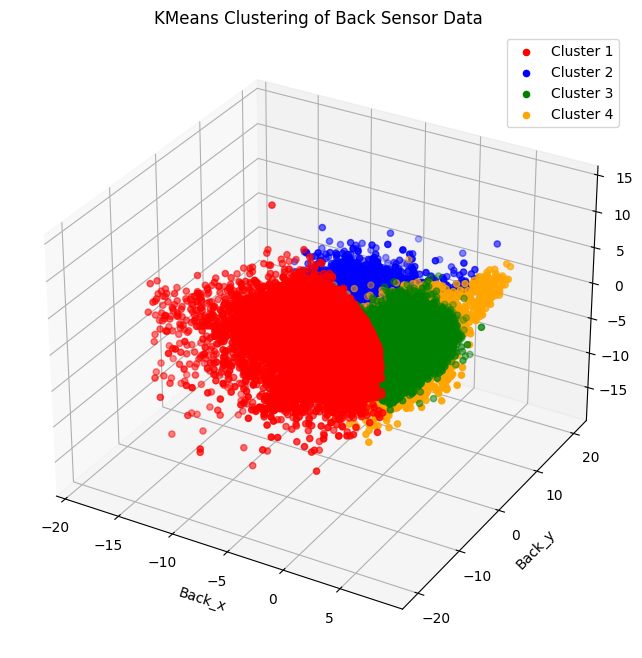

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
back_data = []
# Λίστες για τις μέσες τιμές από κάθε αρχείο
mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'thigh_y', 'back_z']

        # Επιβεβαίωση ότι οι στήλες υπάρχουν στο αρχείο
        if all(col in df.columns for col in columns):
            X = df[columns]

            # Αποθήκευση των δεδομένων στη λίστα
            back_data.append(X)

            # Υπολογισμός μέσης τιμής κάθε στήλης
            mean_values = X.mean().values

            # Προσθήκη των μέσων τιμών στη λίστα
            mean_values_list.append(mean_values)

            # Κρατάμε το όνομα του αρχείου για κάθε δείγμα
            file_names.append(filename)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
back_data_combined = np.concatenate(back_data, axis=0)

# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
back_data_scaled = scaler.fit_transform(back_data_combined)

# Εφαρμογή του αλγορίθμου k-means
kmeans = KMeans(n_clusters=optimal, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(back_data_scaled)

# Εκτύπωση των κέντρων των συστάδων (clusters)
print("Cluster Centers:")
for center in kmeans.cluster_centers_:
    print(center)

# Προβλέψεις για κάθε σημείο δεδομένων
labels = kmeans.labels_

# Οπτικοποίηση των συστάδων σε 3D χώρο
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Χρωματική παλέτα για τις συστάδες
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'pink', 'grey']

# Δημιουργία 3D scatter plot για κάθε συστάδα
for cluster in range(n_clusters):
    cluster_data = back_data_scaled[labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster + 1}', color=colors[cluster])

# Ρυθμίσεις του άξονα
ax.set_xlabel('back_x')
ax.set_ylabel('back_y')
ax.set_zlabel('back_z')
ax.set_title('KMeans Clustering of Back Sensor Data')
ax.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[-0.66473065 -0.07892959 -0.70817355]
[0.60872264 0.10130825 0.75086424]
[-3.13421899 -2.75034901 -0.95781556]
[ 0.33890167 -2.62488615 -0.43716214]
[ 0.56842432 -0.30686041 -1.71876454]
[-1.46396609  0.47985521  0.78317746]
[ 0.97398429  2.59519959 -0.13698421]
[-2.766732    1.70136353 -1.91048211]


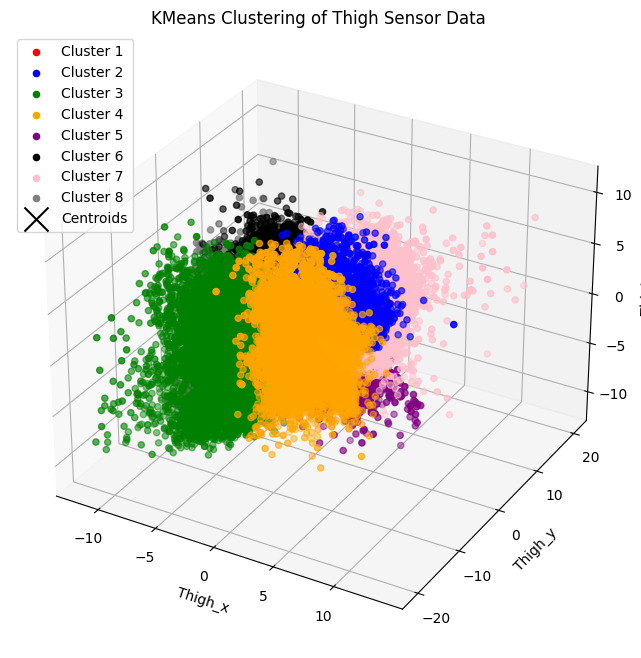

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Για 3D οπτικοποίηση

# Ορισμός του φακέλου που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'

# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
all_data = []

# Λίστες για τις μέσες τιμές από κάθε αρχείο
mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
file_names = []  # Λίστα με τα ονόματα των αρχείων
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))
        file_names.append(filename)  # Κρατάμε το όνομα του αρχείου για κάθε δείγμα

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        X = df[['thigh_x', 'thigh_y', 'thigh_z']].values

        # Αποθήκευση των δεδομένων στη λίστα
        all_data.append(X)

        # Υπολογισμός μέσης τιμής κάθε στήλης
        mean_values = X.mean().values

        # Προσθήκη των μέσων τιμών στη λίστα
        mean_values_list.append(mean_values)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
all_data_combined_thigh = np.concatenate(all_data, axis=0)

# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
all_data_scaled_thigh = scaler.fit_transform(all_data_combined_thigh)

# Εφαρμογή του αλγορίθμου k-means
kmeans = KMeans(n_clusters=optimal, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(all_data_scaled_thigh)

# Εκτύπωση των κέντρων των συστάδων (clusters)
print("Cluster Centers:")
for center in kmeans.cluster_centers_:
    print(center)

# Προβλέψεις για κάθε σημείο δεδομένων
labels = kmeans.labels_

# Οπτικοποίηση των συστάδων σε 3D χώρο
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Χρωματική παλέτα για τις συστάδες
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'pink', 'grey']

# Δημιουργία 3D scatter plot για κάθε συστάδα
for cluster in range(n_clusters):
    cluster_data = all_data_scaled_thigh[labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster + 1}', color=colors[cluster])

# Σημείωση των κεντροειδών με 'X'
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='black', marker='x', label='Centroids')

# Ρυθμίσεις του άξονα
ax.set_xlabel('Thigh_x')
ax.set_ylabel('Thigh_y')
ax.set_zlabel('Thigh_z')
ax.set_title('KMeans Clustering of Thigh Sensor Data')
ax.legend()

plt.show()

# Δημιουργία DataFrame με τα ονόματα των αρχείων ως δείκτες και τις μέσες τιμές ως δεδομένα
mean_values_df = pd.DataFrame(mean_values_list, columns=columns, index=file_names)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ορισμός του φακέλου που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'

# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
all_data = []
# Λίστα για τα ονόματα των αρχείων
file_names = []
# Λίστες για τις μέσες τιμές από κάθε αρχείο
mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))
        file_names.append(filename)  # Κρατάμε το όνομα του αρχείου για κάθε δείγμα

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
        X = df[columns]

        # Αποθήκευση των δεδομένων στη λίστα
        all_data.append(X)

        # Υπολογισμός μέσης τιμής κάθε στήλης
        mean_values = X.mean().values

        # Προσθήκη των μέσων τιμών στη λίστα
        mean_values_list.append(mean_values)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
all_data_combined = np.concatenate(all_data, axis=0)

# Κανονικοποίηση των πλήρων δεδομένων
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_combined)

# Εφαρμογή του αλγορίθμου k-means στα κανονικοποιημένα πλήρη δεδομένα
kmeans = KMeans(n_clusters=4, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(all_data_scaled)
# Εκτύπωση των κέντρων των συστάδων (clusters)
print("Cluster Centers:")
for center in kmeans.cluster_centers_:
    print(center)

# Δημιουργία DataFrame με τα ονόματα των αρχείων ως δείκτες και τις μέσες τιμές ως δεδομένα
mean_values_df = pd.DataFrame(mean_values_list, columns=columns, index=file_names)

# Κανονικοποίηση των μέσων τιμών
mean_values_scaled = scaler.transform(mean_values_df)

# Προβλέψεις για τις συστάδες των μέσων τιμών
cluster_assignments = kmeans.predict(mean_values_scaled)

# Δημιουργία DataFrame με τα αρχεία και τις αντίστοιχες συστάδες
clusters_df = pd.DataFrame({'filename': file_names, 'cluster': cluster_assignments})

# Ομαδοποίηση και εκτύπωση των αρχείων ανά συστάδα
grouped = clusters_df.groupby('cluster')['filename'].apply(list)

for cluster, files in grouped.items():
    print(f"Cluster {cluster}:")
    for file in files:
        print(f"  {file}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[-0.14653896  0.09199837 -0.13901882  0.5404993   0.1340809   0.76091103]
[ 1.87192722  1.34197925  1.14505825  0.62976009 -0.8897732  -1.21160514]
[-0.37705771 -0.07855451  0.18459117 -0.84438893 -0.12946536 -0.72913969]
[ 1.90906958 -1.44099306 -1.27638042  1.00895582  0.6976663   0.28523175]
Cluster 0:
  S017.csv
  S016.csv
  S021.csv
  S015.csv
  S008.csv
  S013.csv
  S019.csv
  S020.csv
  S012.csv
  S014.csv
  S006.csv
  S018.csv
Cluster 2:
  S009.csv
  S010.csv
  S028.csv
  S026.csv
  S029.csv
  S023.csv
  S025.csv
  S022.csv
  S027.csv
  S024.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist

# Ορισμός του φακέλου που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'
# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
all_data = []
# Λίστα για τα ονόματα των αρχείων
file_names = []
# Λίστες για τις μέσες τιμές από κάθε αρχείο
mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))
        file_names.append(filename)  # Κρατάμε το όνομα του αρχείου για κάθε δείγμα

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
        X = df[columns]

        # Αποθήκευση των δεδομένων στη λίστα
        all_data.append(X)

        # Υπολογισμός μέσης τιμής κάθε στήλης
        mean_values = X.mean().values

        # Προσθήκη των μέσων τιμών στη λίστα
        mean_values_list.append(mean_values)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
all_data_combined = np.concatenate(all_data, axis=0)

# Κανονικοποίηση των πλήρων δεδομένων
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_combined)

# Εφαρμογή του αλγορίθμου k-means στα κανονικοποιημένα πλήρη δεδομένα
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(all_data_scaled)

# Δημιουργία DataFrame με τα ονόματα των αρχείων ως δείκτες και τις μέσες τιμές ως δεδομένα
mean_values_df = pd.DataFrame(mean_values_list, columns=columns, index=file_names)

# Κανονικοποίηση των μέσων τιμών
mean_values_scaled = scaler.transform(mean_values_df)

# Υπολογισμός των αποστάσεων κάθε αρχείου από τα κεντροειδή
distances = cdist(mean_values_scaled, kmeans.cluster_centers_, 'euclidean')

# Βρίσκουμε την κοντινότερη συστάδα για κάθε αρχείο
closest_clusters = np.argmin(distances, axis=1)

# Δημιουργία DataFrame με τα αρχεία και τις αντίστοιχες συστάδες
clusters_df = pd.DataFrame({'filename': file_names, 'cluster': closest_clusters})

# Ομαδοποίηση και εκτύπωση των αρχείων ανά συστάδα
grouped = clusters_df.groupby('cluster')['filename'].apply(list)

for cluster, files in grouped.items():
    print(f"Cluster {cluster}:")
    for file in files:
        print(f"  {file}")

# Εκτύπωση των κεντροειδών
print("\nCluster Centers:")
for idx, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {idx}: {center}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
  S017.csv
  S016.csv
  S021.csv
  S015.csv
  S008.csv
  S013.csv
  S019.csv
  S020.csv
  S012.csv
  S014.csv
  S006.csv
  S018.csv
Cluster 2:
  S009.csv
  S010.csv
  S028.csv
  S026.csv
  S029.csv
  S023.csv
  S025.csv
  S022.csv
  S027.csv
  S024.csv

Cluster Centers:
Cluster 0: [-0.14653896  0.09199837 -0.13901882  0.5404993   0.1340809   0.76091103]
Cluster 1: [ 1.87192722  1.34197925  1.14505825  0.62976009 -0.8897732  -1.21160514]
Cluster 2: [-0.37705771 -0.07855451  0.18459117 -0.84438893 -0.12946536 -0.72913969]
Cluster 3: [ 1.90906958 -1.44099306 -1.27638042  1.00895582  0.6976663   0.28523175]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


**Δίκτυο Kohonen**

Cluster 0:
  S009
Cluster 1:
  S017
  S021
  S010
  S015
  S008
  S013
  S019
  S020
  S022
  S012
  S014
  S006
  S018
Cluster 2:
  S016
  S029
  S025
  S027
  S024
Cluster 3:
  S028
  S026
  S023


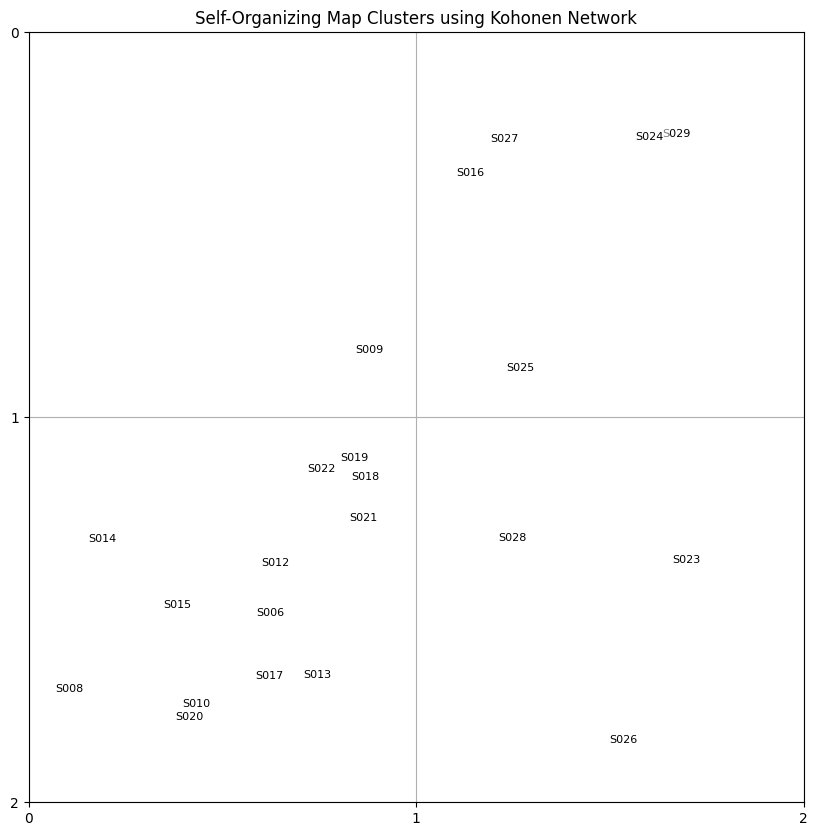

In [6]:
"""import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ορισμός του φακέλου που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'

# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
all_data = []
# Λίστα για τα ονόματα των αρχείων
file_names = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))
        file_names.append(filename)  # Κρατάμε το όνομα του αρχείου για κάθε δείγμα

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
        X = df[columns]

        # Αποθήκευση των δεδομένων στη λίστα
        all_data.append(X)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
all_data_combined = np.concatenate(all_data, axis=0)

# Κανονικοποίηση των πλήρων δεδομένων
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_combined)
"""
from minisom import MiniSom

# Ορισμός παραμέτρων για το SOM
som_size = 2  # Καθορίζουμε το πλήθος των συστάδων που θα κατασκευάσουμε
som = MiniSom(som_size, som_size, len(columns), sigma=0.5, learning_rate=0.5, random_seed=42)

# Εκπαίδευση του SOM
som.train_random(all_data_scaled, 100)  # 100 επαναλήψεις του αλγορίθμου

# Ανάθεση κάθε συμμετέχοντα σε μια συστάδα
cluster_assignments = []
mean_values_scaled = scaler.transform([np.mean(X, axis=0) for X in all_data])
for i, x in enumerate(mean_values_scaled):
    win_position = som.winner(x)
    cluster_assignments.append((file_names[i], win_position))

# Δημιουργία λεξικού για τις συστάδες
cluster_dict = {i: [] for i in range(som_size * som_size)}
for file_name, cluster in cluster_assignments:
    cluster_index = cluster[0] * som_size + cluster[1]
    cluster_dict[cluster_index].append(file_name)

# Εκτύπωση των τελικών συστάδων
for cluster, files in cluster_dict.items():
    print(f"Cluster {cluster}:")
    for file in files:
       base_name = os.path.splitext(file)[0]
       print(f"  {base_name}")

# Οπτικοποίηση του SOM
plt.figure(figsize=(10, 10))
for file_name, (x, y) in cluster_assignments:
    offset_x = np.random.uniform(-0.4, 0.4)
    offset_y = np.random.uniform(-0.4, 0.4)
    base_name = os.path.splitext(file_name)[0]
    plt.text(x + 0.5 + offset_x, y + 0.5 + offset_y, base_name, fontsize=8, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))

# Προσθέτουμε τα περιγράμματα για τα κελιά του SOM
plt.xlim([0, som_size])
plt.ylim([0, som_size])
plt.xticks(np.arange(som_size+1))
plt.yticks(np.arange(som_size+1))
plt.grid()
plt.title('Self-Organizing Map Clusters using Kohonen Network')
plt.gca().invert_yaxis()  # Αντιστρέφουμε τον άξονα y για καλύτερη απεικόνιση
plt.show()

**Gaussian Mixture**